In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


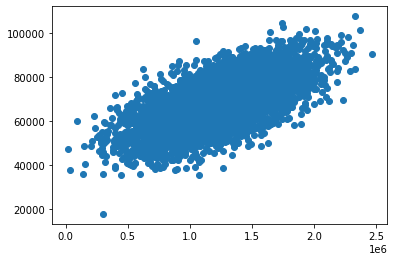

In [12]:
plt.scatter(df['Price'],df['Avg. Area Income'])

<AxesSubplot:xlabel='Price', ylabel='Avg. Area Income'>

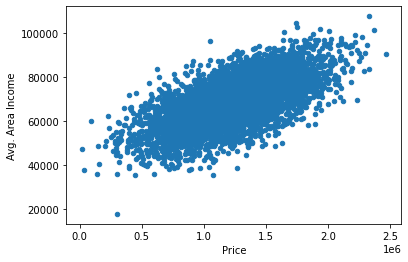

In [13]:
df.plot.scatter('Price','Avg. Area Income')

In [14]:
df['Address'].unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [15]:
df['Address'].nunique()

5000

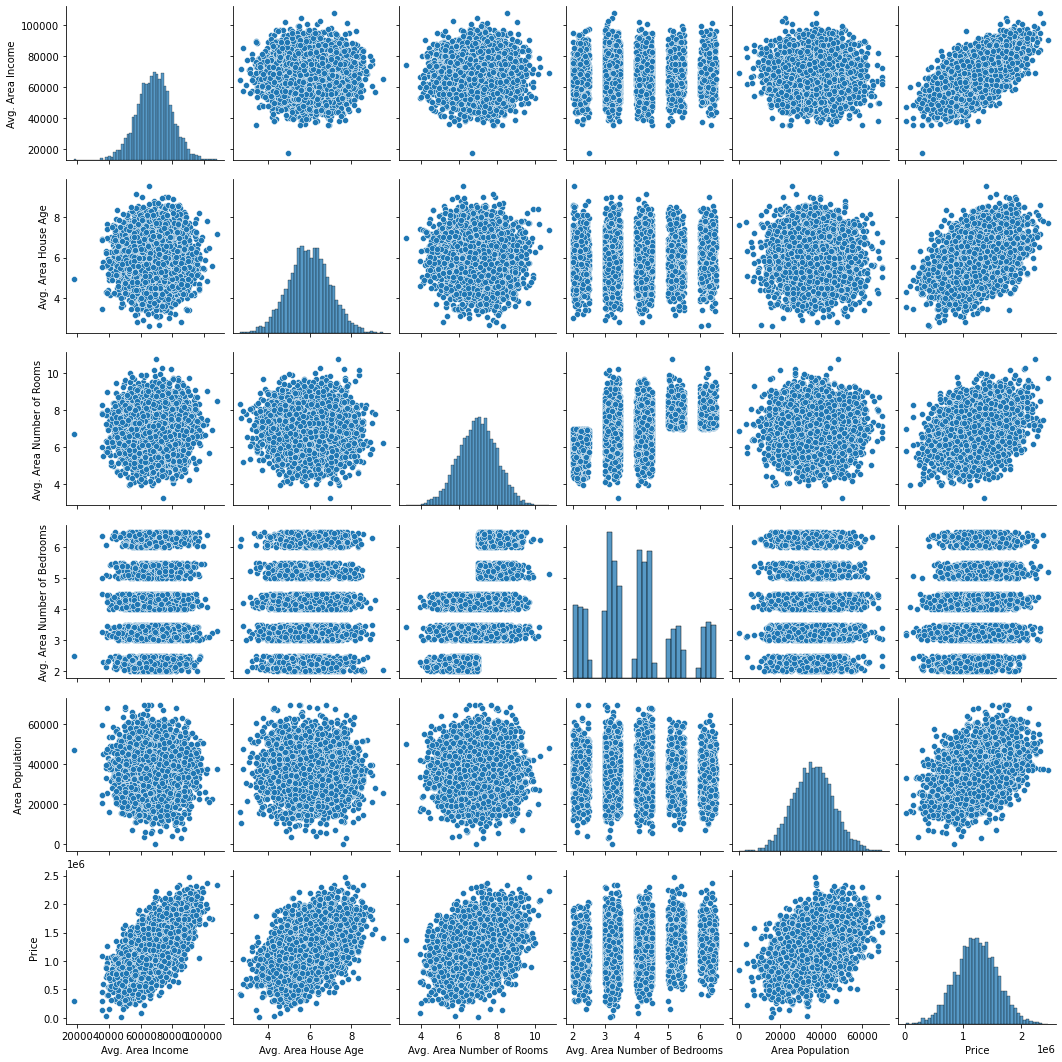

In [16]:
sns.pairplot(df)

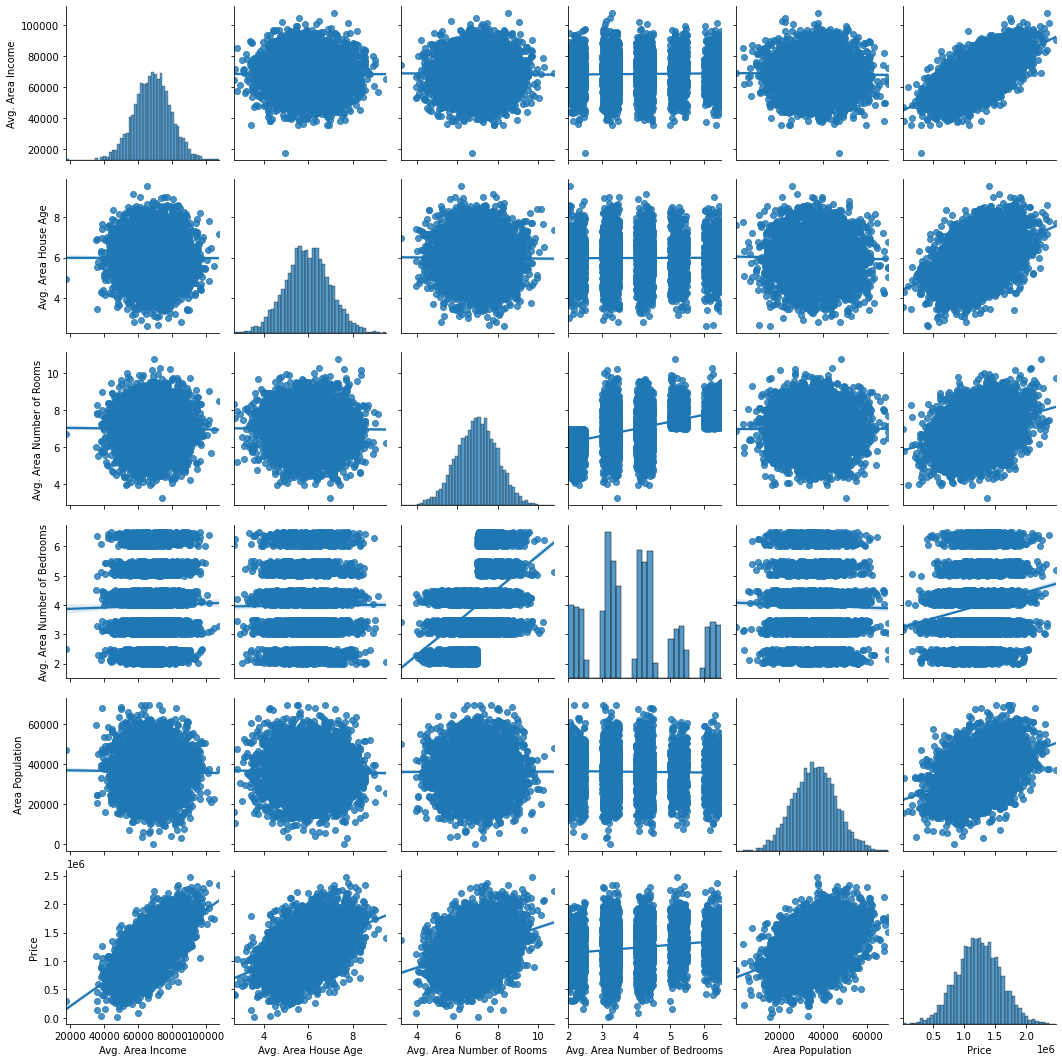

In [17]:
sns.pairplot(df,kind='reg')

<AxesSubplot:>

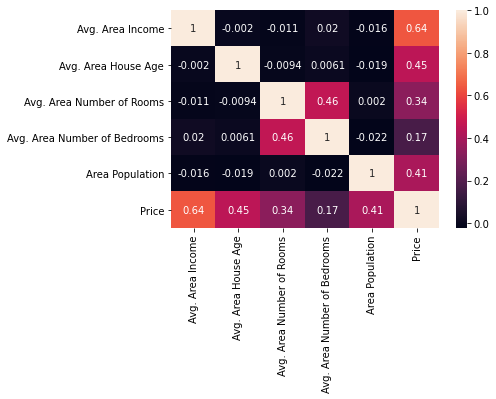

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [20]:
#Feature Matrix
x=df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
#Label Matrix
y = df['Price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25 , random_state=101)

In [23]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 3430 to 4959
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [24]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1718 to 3063
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [26]:
ytrain.shape

(3750,)

In [27]:
ytest.shape

(1250,)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression().fit(xtrain,ytrain)

In [30]:
model

LinearRegression()

In [31]:
model.coef_

array([2.16411925e+01, 1.64948656e+05, 1.22327933e+05, 1.52429772e+01])

In [34]:
coef = pd.DataFrame(model.coef_,columns= ['Coeff'],index=x.columns)
coef

,Coeff
Avg. Area Income,21.641192
Avg. Area House Age,164948.655552
Avg. Area Number of Rooms,122327.933150
Area Population,15.242977


In [36]:
round(100*model.score(xtest,ytest),2)

91.71

In [37]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [38]:
ypred = model.predict(xtest)

In [40]:
xtest.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
1718,66774.995817,5.717143,7.795215,36788.980327
2511,62184.539375,4.925758,7.427689,26008.309124
345,73643.057298,6.766853,8.337085,43152.139577
2521,61909.041438,6.228343,6.593138,28953.925377
54,72942.705059,4.786222,7.319886,24377.909049


In [41]:
ypred[:5]

array([1258976.14439244,  819807.04069241, 1744036.82861757,
        971515.59800993,  991570.84896593])

In [43]:
ytest[:5].values

array([1251688.61570287,  873048.31964236, 1696977.6628326 ,
       1063964.28787395,  948788.27570945])

In [45]:
print(mean_absolute_error(ytest,ypred))

81836.17794531888


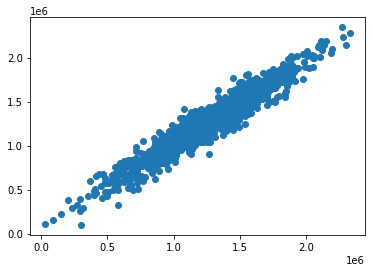

In [46]:
plt.scatter(ytest,ypred)

In [47]:
pd.to_pickle(model, 'house_price_predictor.pkl')